
# This will take a pre-built graph:

* Pack:  
    * VirusTotal  
        * Integration  
            id: virus-total-integration  
        * Playbook:  
            id: virus-total-detonate-file  
            depends-on: virus-total-integration  
        * TestPlaybook:  
            id: virus-total-test-playbook  
            deprends-on: virus-total-detonate-file  


* Map:  
```mermaid
  graph TD;
      virus-total-test-playbook-->virus-total-detonate-file  ;
      virus-total-detonate-file-->virus-total-integration  ;
```

To generate the readme:




In [1]:
import networkx as nx
from IPython.display import display
from IPython.core.display import HTML
import pylab as plt

graph = nx.DiGraph()
vt_integration = 'virus-total-integration'
vt_pbook = 'virus-total-detonate-file'
vt_tpbook = 'virus-total-test-playbook'
graph.add_nodes_from([vt_integration, vt_pbook, vt_tpbook])
graph.add_edge(vt_tpbook, vt_pbook)
graph.add_edge(vt_pbook, vt_integration)
nx.write_graphml(graph, 'dependency.graphml')
with open('dependency.graphml') as f:
    display(HTML(f.read()))
# nx.draw_networkx(graph)
# plt.title('Basic Graph')
# plt.show()


NameError: name 'HTML' is not defined

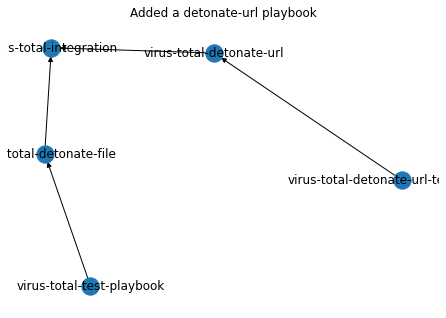

In [ ]:
vt_pbook_url = 'virus-total-detonate-url'
vt_tpbook_url = 'virus-total-detonate-url-test-playbook'
graph.add_nodes_from([vt_pbook_url, vt_tpbook_url])
graph.add_edge(vt_tpbook_url, vt_pbook_url)
graph.add_edge(vt_pbook_url, vt_integration)
nx.draw(graph, with_labels=True)
plt.title('Added a detonate-url playbook')
plt.show()

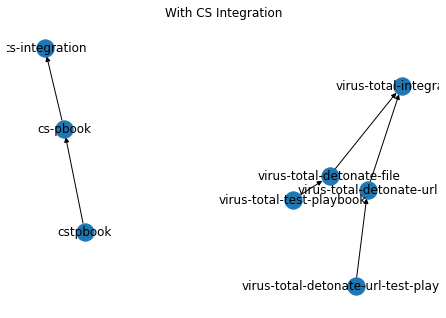

In [ ]:
cs_integration = 'cs-integration'
cs_pbook = 'cs-pbook'
cs_tpbook = 'cstpbook'
graph.add_nodes_from([cs_integration, cs_pbook, cs_tpbook])
graph.add_edge(cs_tpbook, cs_pbook)
graph.add_edge(cs_pbook, cs_integration)
nx.draw(graph, with_labels=True)
plt.title('With CS Integration')
plt.show()

In [ ]:
graph.out_edges(vt_tpbook)

OutEdgeDataView([('virus-total-test-playbook', 'virus-total-detonate-file')])

In [ ]:
graph.in_edges(vt_integration)

InEdgeDataView([('virus-total-detonate-file', 'virus-total-integration'), ('virus-total-detonate-url', 'virus-total-integration')])

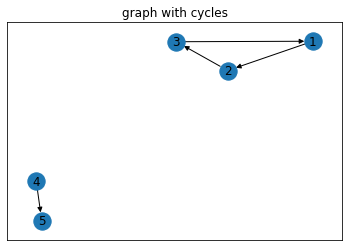

'Cycles found: [(1, 2), (2, 3), (3, 1)]'

In [ ]:
graph_with_cycles = nx.DiGraph()
graph_with_cycles.add_nodes_from((1, 2, 3, 4, 5))
graph_with_cycles.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
plt.title('graph with cycles')
nx.draw_networkx(graph_with_cycles)
plt.show()
f'Cycles found: {nx.find_cycle(graph_with_cycles)}'